In [ ]:
#from google.colab import files
# uploaded = files.upload()


# Tiffany

Text(0.5, 1.0, 'Acres burned per year in the US')

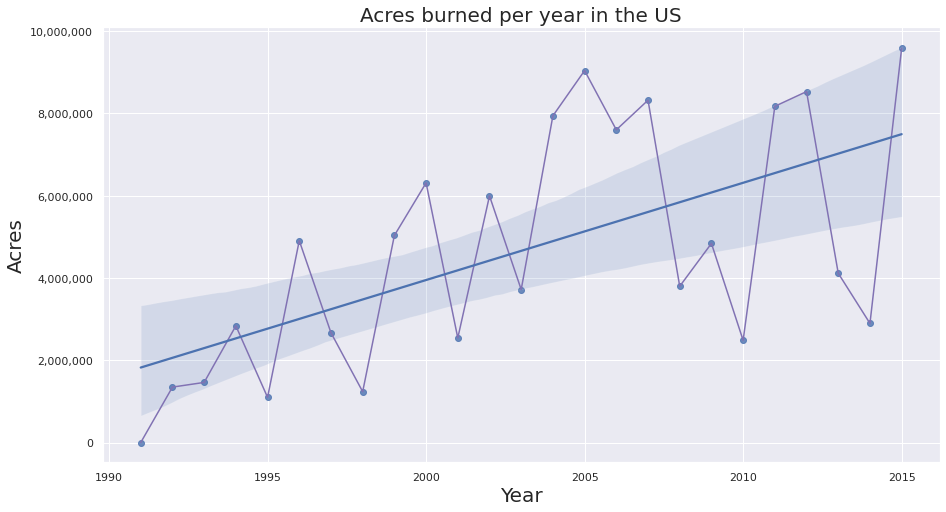

In [ ]:
#Tiffany
#line graph of Acres burned per year in the US
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats


# read data and display with all columns
pd.set_option('display.max_columns', None)
df1 = pd.read_csv('FW_Veg_Rem_Combined.csv')

df_by_size= df1.groupby('disc_pre_year')['fire_size'].sum().reset_index(name='fire_size')
df_by_size
plt.subplots(figsize=(15,8))
lp = sns.lineplot(data=df_by_size, x='disc_pre_year',y='fire_size', color='m')
lp = sns.regplot(x='disc_pre_year',y='fire_size',data=df_by_size)
lp.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
lp.set_xlabel("Year",fontsize = 20)
lp.set_ylabel("Acres",fontsize = 20)
lp.set_title("Acres burned per year in the US",fontsize = 20)

In [ ]:
#Tiffany
#bar graph of top 10 US states by total of wildfires
df_by_state= df1.groupby('state')['fire_size'].count().reset_index(name='number_fires')
df_by_state = df_by_state.sort_values(['number_fires'], ascending=False)
df_by_state = df_by_state.head(10)
df_by_state

,state,number_fires
43,TX,6080
9,GA,4811
4,CA,3847
24,MS,3493
8,FL,3115
40,SC,2780
26,NC,2591
1,AL,2528
35,OK,1963
2,AR,1537


Text(0.5, 1.0, 'The top 10 US states by total of wildfires')

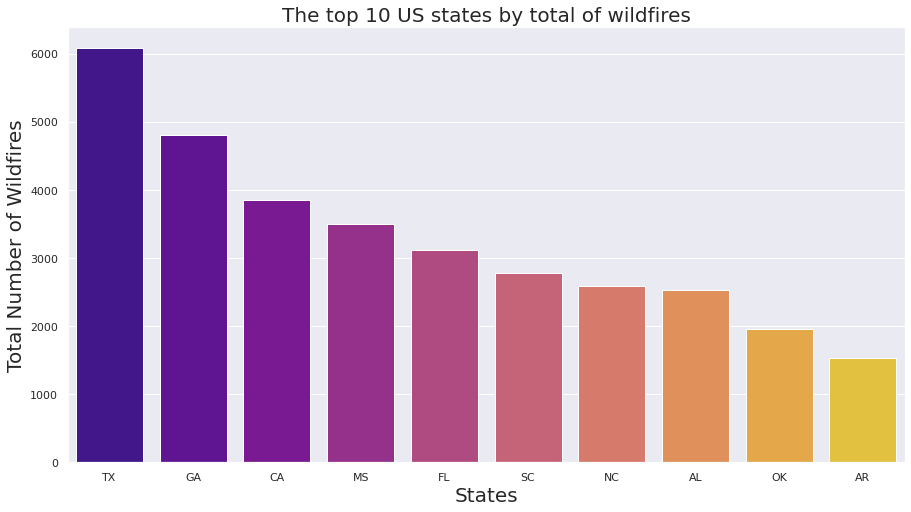

In [ ]:
plt.subplots(figsize=(15,8))
sns.barplot(x='state', y='number_fires', data=df_by_state, palette='plasma')
plt.xlabel("States", fontsize = 20)
plt.ylabel("Total Number of Wildfires", fontsize = 20)
plt.title("The top 10 US states by total of wildfires", fontsize = 20)

In [ ]:
#Tiffany
#Pie graph of wildfire causes
#creating a new dataframe grouped wildfires by their cause
cause_type = df1.groupby(['stat_cause_descr']).size().reset_index(name='number_wf_caused')
cause_type = cause_type.drop([7,8]) #droping fron dataframe the nonspecific causes
cause_type = cause_type.sort_values('number_wf_caused', ascending=False)
print(cause_type)

   stat_cause_descr  number_wf_caused
3    Debris Burning             14278
0             Arson              9724
6         Lightning              8218
4     Equipment Use              4107
1          Campfire              1367
2          Children              1280
11          Smoking              1181
10         Railroad              1021
9         Powerline               483
5         Fireworks               223
12        Structure                78


In [ ]:
#Creating 'others'
cause_type2 = cause_type[:4].copy()
new_row = pd.DataFrame(data = {
    'stat_cause_descr' : ['Others'],
    'number_wf_caused' : [cause_type['number_wf_caused'][4:].sum()]})


In [ ]:
#combining top 5 with others and plotting pie chart
cause_type2 = pd.concat([cause_type2, new_row])

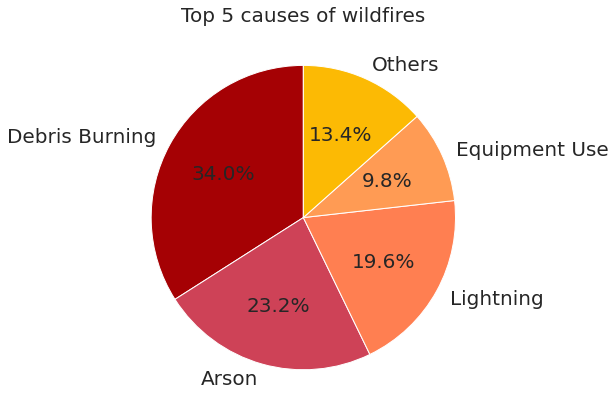

In [ ]:
plt.figure(figsize=(15,8))
ax1 = plt.subplot(121, aspect='equal')
colors = ['#a50104','#ce4257','#ff7f51','#ff9b54','#fcba04']
cause_type2.plot(kind='pie', y = 'number_wf_caused', ax=ax1, autopct='%1.1f%%', colors=colors, 
 startangle=90, shadow=False, labels=cause_type2['stat_cause_descr'], legend = False, fontsize=20)
plt.title('Top 5 causes of wildfires', fontsize = 20)
plt.ylabel(None)
plt.show()


# KRISTIN

In [ ]:
import numpy as np
import pandas as pd
#pd.set_option('display.max_rows',None)
#pd.set_option('display.max_columns',None)
csvframe = pd.read_csv('FW_Veg_Rem_Combined.csv')
csvframe #original

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,disc_date_final,cont_date_final,putout_time,disc_date_pre,disc_pre_year,disc_pre_month,wstation_usaf,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,NaN,Feb,NaN,NaN,NaN,1/12/2007,2007,Jan,785140,58917.697160,11603,1945,2018,12,1.0,785140-11603-2007.gz,24.480974,24.716923,24.902597,24.527961,4.341807,3.492857,3.262092,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,NaN,Dec,NaN,NaN,NaN,11/11/2006,2006,Nov,723235,32665.343270,13896,1978,2020,15,0.1,723235-13896-2006.gz,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,NaN,Feb,NaN,NaN,NaN,1/30/2004,2004,Jan,723235,105122.149500,13896,1978,2020,16,1.0,723235-13896-2004.gz,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,6/6/2005,Jun,6/6/2005 2:14,6/6/2005 18:00,0 days 00:00:00.000000000,5/7/2005,2005,May,724880,43433.329780,23185,1942,2020,0,0.1,724880-23185-2005.gz,16.275967,18.996181,18.142564,0.000000,4.054982,3.398329,3.671282,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,NaN,Sep,NaN,NaN,NaN,8/23/1999,1999,Aug,722312,25940.574090,3908,1987,2016,12,0.1,File Not Found,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55362,55362,55362,IMPACT,6289.0,G,Missing/Undefined,39.180000,-96.784167,KS,10/15/2015,NaN,Oct,10/15/2015 13:00,NaN,NaN,9/15/2015,2015,Sep,724550,9004.604868,99999,2006,2020,0,100.0,724550-13947-2015.gz,19.720799,16.891282,18.918994,13.242324,3.259176,2.705398,3.196648,3.804803,65.671410,61.839572,54.625698,55.042092,35.4,8.2,0.0,249.0,0.331501
55363,55363,55363,BUTTE,70868.0,G,Missing/Undefined,38.342719,-120.695967,CA,9/9/2015,10/1/2015,Sep,9/9/2015 14:25,10/1/2015 8:00,22,8/10/2015,2015,Aug,720681,22236.095780,99999,2010,2020,0,100.0,File Not Found,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.124683
55364,55364,55364,WILLOW,5702.0,G,Arson,37.262607,-119.511139,CA,7/25/2015,NaN,Jul,7/25/2015 13:52,NaN,NaN,6/25/2015,2015,Jun,723897,64987.396810,99999,2006,2020,0,100.0,723897-99999-2015.gz,28.425403,28.425403,28.166667,27.646067,2.649395,2.649395,2.667722,2.529158,43.755556,43.755556,44.443975,35.924406,0.0,0.0,0.0,0.0,0.097682
55365,55365,55365,BARKER,3261.0,F,Miscellaneous,40.604300,-123.080450,CA,7/31/2015,9/12/2015,Jul,7/31/2015 12:34,9/12/2015 1:13,43,7/1/2015,2015,Jul,721027,53219.630130,99999,2012,2019,15,50.0,File Not Found,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.178206


In [ ]:
csvframe.describe()

,Unnamed: 0,Unnamed: 0.1,fire_size,latitude,longitude,disc_pre_year,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
count,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000
mean,27683.000000,27683.000000,2104.645161,36.172866,-94.757971,2003.765474,40256.474678,61029.607311,1979.341900,2015.480990,11.066068,9.414366,10.688533,10.800765,10.907171,7.838208,1.926108,1.844133,1.791331,1.132284,40.781796,38.453935,37.001865,25.056738,26.277046,11.654253,4.689920,15.590440,0.236799
std,15983.220514,15983.220514,14777.005364,6.724348,15.878194,6.584889,25272.081410,40830.393541,23.372803,6.767851,5.595719,26.820363,10.467579,10.633803,10.807985,10.565555,2.106165,2.122697,2.139708,2.030611,31.086856,31.042541,30.827885,31.187638,112.050198,56.920510,31.205327,59.757113,0.144865
min,0.000000,0.000000,0.510000,17.956533,-165.936000,1991.000000,6.166452,100.000000,1931.000000,1993.000000,0.000000,0.100000,-49.210526,-37.000000,-20.846104,-22.750000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,13841.500000,13841.500000,1.200000,32.265960,-102.541513,1999.000000,21373.361515,13927.000000,1973.000000,2010.000000,9.000000,0.100000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.137800
50%,27683.000000,27683.000000,4.000000,34.600000,-91.212359,2005.000000,35621.334820,73803.000000,1978.000000,2020.000000,12.000000,0.100000,9.945559,10.122047,10.237860,0.000000,2.422880,2.295954,2.175431,0.000000,55.657480,51.753846,48.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.202114
75%,41524.500000,41524.500000,20.000000,38.975235,-82.847500,2009.000000,53985.904315,99999.000000,2004.000000,2020.000000,15.000000,1.000000,20.015591,20.259329,20.502848,17.011853,3.469751,3.435482,3.392260,2.848603,67.384352,65.911469,64.645296,60.193606,18.900000,3.600000,0.000000,0.000000,0.284782
max,55366.000000,55366.000000,606945.000000,69.849500,-65.285833,2015.000000,224153.661800,99999.000000,2014.000000,2020.000000,16.000000,100.000000,46.600000,51.567797,55.000000,55.000000,29.800000,29.800000,25.700000,24.200000,96.000000,94.000000,96.000000,94.000000,13560.800000,2527.000000,1638.000000,2126.000000,1.000000


In [ ]:
csvframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55367 entries, 0 to 55366
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        55367 non-null  int64  
 1   Unnamed: 0.1      55367 non-null  int64  
 2   fire_name         25913 non-null  object 
 3   fire_size         55367 non-null  float64
 4   fire_size_class   55367 non-null  object 
 5   stat_cause_descr  55367 non-null  object 
 6   latitude          55367 non-null  float64
 7   longitude         55367 non-null  float64
 8   state             55367 non-null  object 
 9   disc_clean_date   55367 non-null  object 
 10  cont_clean_date   27477 non-null  object 
 11  discovery_month   55367 non-null  object 
 12  disc_date_final   28708 non-null  object 
 13  cont_date_final   25632 non-null  object 
 14  putout_time       27477 non-null  object 
 15  disc_date_pre     55367 non-null  object 
 16  disc_pre_year     55367 non-null  int64 

In [ ]:
print(sum(csvframe.duplicated())) #checking for duplicates

0


In [ ]:
csvframe.shape

(55367, 43)

In [ ]:
csvframe.isna().sum() #finding the null values

Unnamed: 0              0
Unnamed: 0.1            0
fire_name           29454
fire_size               0
fire_size_class         0
stat_cause_descr        0
latitude                0
longitude               0
state                   0
disc_clean_date         0
cont_clean_date     27890
discovery_month         0
disc_date_final     26659
cont_date_final     29735
putout_time         27890
disc_date_pre           0
disc_pre_year           0
disc_pre_month          0
wstation_usaf           0
dstation_m              0
wstation_wban           0
wstation_byear          0
wstation_eyear          0
Vegetation              0
fire_mag                0
weather_file            0
Temp_pre_30             0
Temp_pre_15             0
Temp_pre_7              0
Temp_cont               0
Wind_pre_30             0
Wind_pre_15             0
Wind_pre_7              0
Wind_cont               0
Hum_pre_30              0
Hum_pre_15              0
Hum_pre_7               0
Hum_cont                0
Prec_pre_30 

In [ ]:
new_csv = csvframe.drop(columns=['Unnamed: 0','Unnamed: 0.1','fire_name','disc_date_final', 'disc_clean_date', 'cont_clean_date',
                                 'latitude','longitude','stat_cause_descr','cont_date_final','putout_time','wstation_eyear',
                                 'wstation_byear','wstation_wban','dstation_m','wstation_usaf','weather_file'])
new_csv

,fire_size,fire_size_class,state,discovery_month,disc_date_pre,disc_pre_year,disc_pre_month,Vegetation,fire_mag,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,10.0,C,PR,Feb,1/12/2007,2007,Jan,12,1.0,24.480974,24.716923,24.902597,24.527961,4.341807,3.492857,3.262092,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,3.0,B,TN,Dec,11/11/2006,2006,Nov,15,0.1,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,60.0,C,MS,Feb,1/30/2004,2004,Jan,16,1.0,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,1.0,B,NV,Jun,5/7/2005,2005,May,0,0.1,16.275967,18.996181,18.142564,0.000000,4.054982,3.398329,3.671282,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,2.0,B,LA,Sep,8/23/1999,1999,Aug,12,0.1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55362,6289.0,G,KS,Oct,9/15/2015,2015,Sep,0,100.0,19.720799,16.891282,18.918994,13.242324,3.259176,2.705398,3.196648,3.804803,65.671410,61.839572,54.625698,55.042092,35.4,8.2,0.0,249.0,0.331501
55363,70868.0,G,CA,Sep,8/10/2015,2015,Aug,0,100.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.124683
55364,5702.0,G,CA,Jul,6/25/2015,2015,Jun,0,100.0,28.425403,28.425403,28.166667,27.646067,2.649395,2.649395,2.667722,2.529158,43.755556,43.755556,44.443975,35.924406,0.0,0.0,0.0,0.0,0.097682
55365,3261.0,F,CA,Jul,7/1/2015,2015,Jul,15,50.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.178206


In [ ]:
#Converts 'disc_date_pre' (date at which the fire was discovered) to datetime
new_csv['disc_date_pre'] = new_csv['disc_date_pre'].astype('datetime64')
new_csv.dtypes

fire_size                 float64
fire_size_class            object
state                      object
discovery_month            object
disc_date_pre      datetime64[ns]
disc_pre_year               int64
disc_pre_month             object
Vegetation                  int64
fire_mag                  float64
Temp_pre_30               float64
Temp_pre_15               float64
Temp_pre_7                float64
Temp_cont                 float64
Wind_pre_30               float64
Wind_pre_15               float64
Wind_pre_7                float64
Wind_cont                 float64
Hum_pre_30                float64
Hum_pre_15                float64
Hum_pre_7                 float64
Hum_cont                  float64
Prec_pre_30               float64
Prec_pre_15               float64
Prec_pre_7                float64
Prec_cont                 float64
remoteness                float64
dtype: object

In [ ]:
#df['disc_date_pre'] =pd.to_datetime(new_csv.disc_date_pre)
new_csv = new_csv.sort_values(by='disc_date_pre')
new_csv
#sorted data by date

,fire_size,fire_size_class,state,discovery_month,disc_date_pre,disc_pre_year,disc_pre_month,Vegetation,fire_mag,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
26174,1.0,B,SC,Jan,1991-12-02,1991,Dec,16,0.1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.114297
36368,1.0,B,MS,Jan,1991-12-02,1991,Dec,12,0.1,14.307736,11.989691,9.966667,0.000000,2.800860,2.478866,1.947059,0.000000,74.985673,73.443299,77.401961,0.000000,0.0,0.0,0.0,0.0,0.197725
35498,15.0,C,SC,Jan,1991-12-02,1991,Dec,16,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.120850
17468,2.0,B,MS,Jan,1991-12-02,1991,Dec,12,0.1,10.573992,9.989972,8.107186,0.000000,3.430181,3.441504,2.091617,0.000000,71.371014,69.751429,78.012579,0.000000,468.4,13.5,9.6,0.0,0.206875
35921,1.0,B,SC,Jan,1991-12-03,1991,Dec,16,0.1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.120069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10078,4.0,B,OK,Dec,2015-11-19,2015,Nov,15,0.1,8.858142,9.528037,8.876984,5.805556,2.490060,2.371495,2.700397,2.800000,69.677284,69.278826,72.855769,70.169014,0.0,0.0,0.0,0.0,0.267574
4184,20.0,C,TX,Dec,2015-11-21,2015,Nov,16,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.278141
43057,154.7,D,OK,Dec,2015-11-22,2015,Nov,15,3.0,8.850150,9.841121,7.172619,10.879630,2.522428,2.643738,2.883929,3.073611,70.870247,70.148691,70.987395,63.806604,0.0,0.0,0.0,0.0,0.266817
7942,1.0,B,TX,Dec,2015-11-24,2015,Nov,12,0.1,7.215417,8.150741,6.038790,2.830743,1.850417,1.709167,1.954167,2.425000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.262454


In [ ]:
new_csv.shape

(55367, 26)

In [ ]:
new_csv.isna().sum()

fire_size          0
fire_size_class    0
state              0
discovery_month    0
disc_date_pre      0
disc_pre_year      0
disc_pre_month     0
Vegetation         0
fire_mag           0
Temp_pre_30        0
Temp_pre_15        0
Temp_pre_7         0
Temp_cont          0
Wind_pre_30        0
Wind_pre_15        0
Wind_pre_7         0
Wind_cont          0
Hum_pre_30         0
Hum_pre_15         0
Hum_pre_7          0
Hum_cont           0
Prec_pre_30        0
Prec_pre_15        0
Prec_pre_7         0
Prec_cont          0
remoteness         0
dtype: int64

In [ ]:
new_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55367 entries, 26174 to 39323
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fire_size        55367 non-null  float64       
 1   fire_size_class  55367 non-null  object        
 2   state            55367 non-null  object        
 3   discovery_month  55367 non-null  object        
 4   disc_date_pre    55367 non-null  datetime64[ns]
 5   disc_pre_year    55367 non-null  int64         
 6   disc_pre_month   55367 non-null  object        
 7   Vegetation       55367 non-null  int64         
 8   fire_mag         55367 non-null  float64       
 9   Temp_pre_30      55367 non-null  float64       
 10  Temp_pre_15      55367 non-null  float64       
 11  Temp_pre_7       55367 non-null  float64       
 12  Temp_cont        55367 non-null  float64       
 13  Wind_pre_30      55367 non-null  float64       
 14  Wind_pre_15      55367 non-null  f

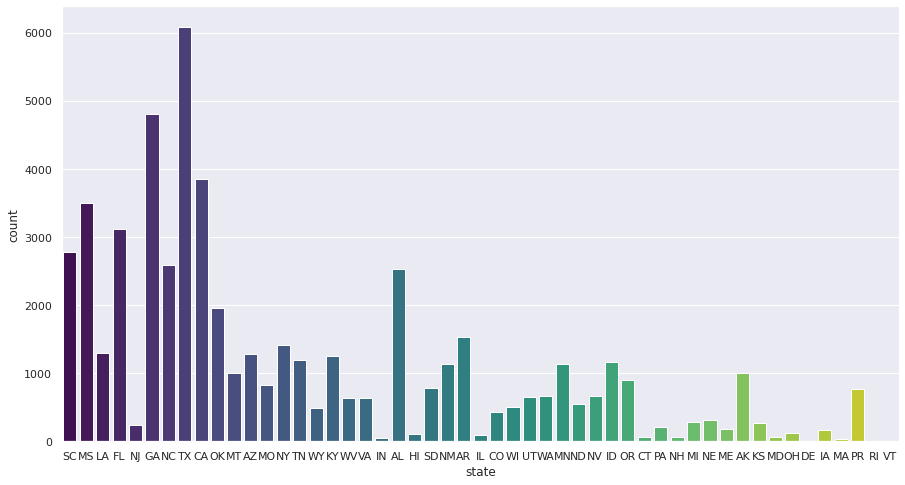

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(figsize=(15,8))
sns.countplot(x='state', data=new_csv, palette='viridis')

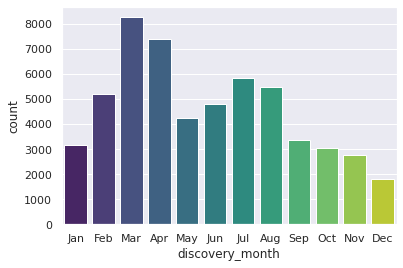

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='discovery_month', order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], data=new_csv, palette='viridis')


In [ ]:
#Sort wildfires by TX
tx_csv = new_csv[new_csv['state'] == 'TX']
tx_csv

,fire_size,fire_size_class,state,discovery_month,disc_date_pre,disc_pre_year,disc_pre_month,Vegetation,fire_mag,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
19272,5.0,B,TX,Jan,1991-12-25,1991,Dec,12,0.1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.245942
24608,15.0,C,TX,Feb,1992-01-20,1992,Jan,12,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.255577
20886,2.0,B,TX,Feb,1992-01-20,1992,Jan,12,0.1,11.773663,12.663855,16.237391,15.922290,3.665979,4.027016,3.969565,4.067008,64.611111,65.388186,67.980769,60.402062,0.0,0.0,0.0,0.0,0.255026
4681,1.0,B,TX,Feb,1992-01-21,1992,Jan,16,0.1,10.315936,10.972989,13.793210,13.945627,3.811127,4.015850,4.319255,4.202774,64.920968,64.003257,67.190141,64.201288,0.0,0.0,0.0,0.0,0.249197
13113,40.0,C,TX,Feb,1992-01-21,1992,Jan,12,1.0,12.385979,13.338956,16.844348,16.008182,3.264050,3.559438,3.498261,3.727107,65.964377,66.783410,63.514851,60.741093,0.0,0.0,0.0,0.0,0.254324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15394,1.0,B,TX,Dec,2015-11-07,2015,Nov,16,0.1,10.371172,7.470101,6.322512,9.531784,3.345203,3.174646,1.898104,3.492943,72.674114,79.547208,77.630695,70.789809,0.0,0.0,0.0,0.0,0.279478
14807,2.0,B,TX,Dec,2015-11-07,2015,Nov,12,0.1,13.062657,10.238117,8.474653,13.418126,2.411245,2.297761,1.263366,2.570162,77.736026,81.418319,80.186992,80.985346,86.9,30.5,4.4,122.0,0.269240
13789,20.0,C,TX,Dec,2015-11-09,2015,Nov,12,1.0,11.674393,9.485117,7.170167,11.325033,2.136054,1.964526,0.674702,2.772164,74.051506,81.293578,73.949881,72.638201,33.4,27.3,7.2,36.1,0.291377
4184,20.0,C,TX,Dec,2015-11-21,2015,Nov,16,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.278141


matplotlib.axes._subplots.AxesSubplot

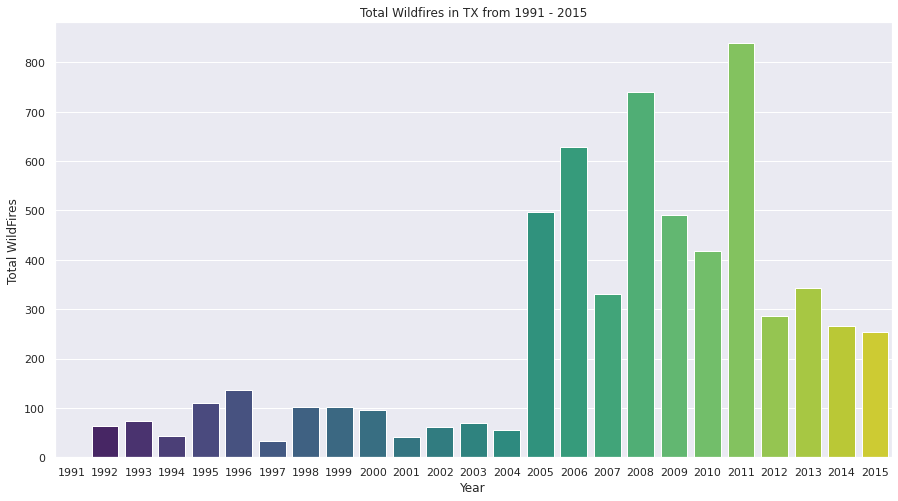

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.countplot(x='disc_pre_year', data=tx_csv, palette='viridis')
ax.set_xlabel('Year')
ax.set_ylabel('Total WildFires')
ax.set_title('Total Wildfires in TX from 1991 - 2015')
type(ax)

matplotlib.axes._subplots.AxesSubplot

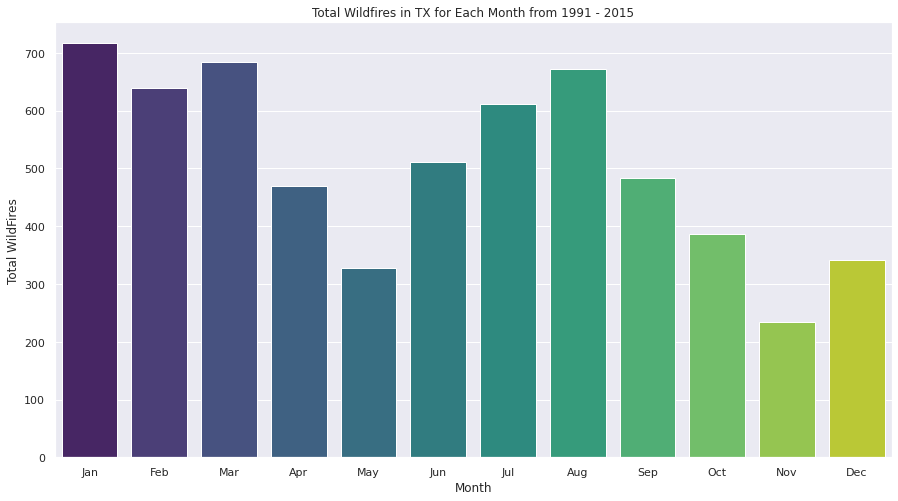

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.countplot(x='discovery_month', order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], data=tx_csv, palette='viridis')

ax.set_xlabel('Month')
ax.set_ylabel('Total WildFires')
ax.set_title('Total Wildfires in TX for Each Month from 1991 - 2015')
type(ax)

([<matplotlib.axis.XTick at 0x7f01e27fd550>,
 <a list of 25 Text major ticklabel objects>)

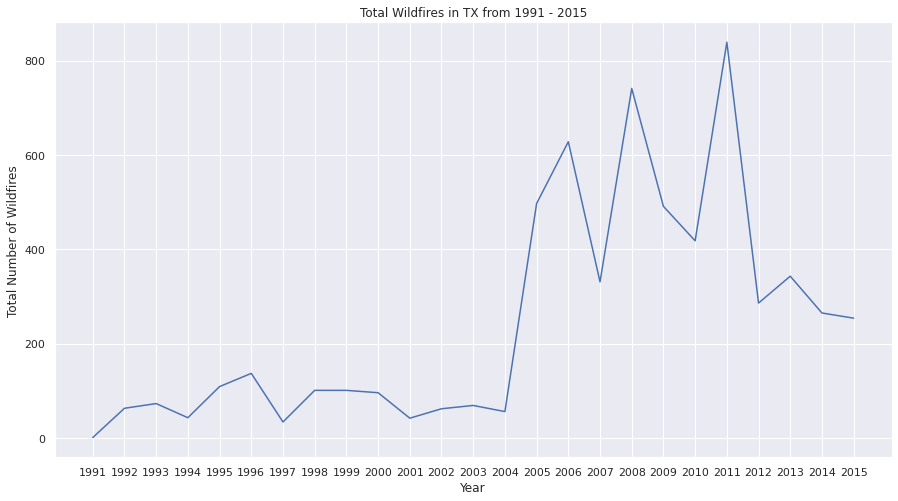

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
tx_csv.groupby('disc_pre_year')['state'].count().plot(kind='line')
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Wildfires')
ax.set_title('Total Wildfires in TX from 1991 - 2015')
type(ax)
x = np.arange(1991, 2016, 1)
plt.xticks(x)


([<matplotlib.axis.XTick at 0x7f01e2774710>,
 <a list of 25 Text major ticklabel objects>)

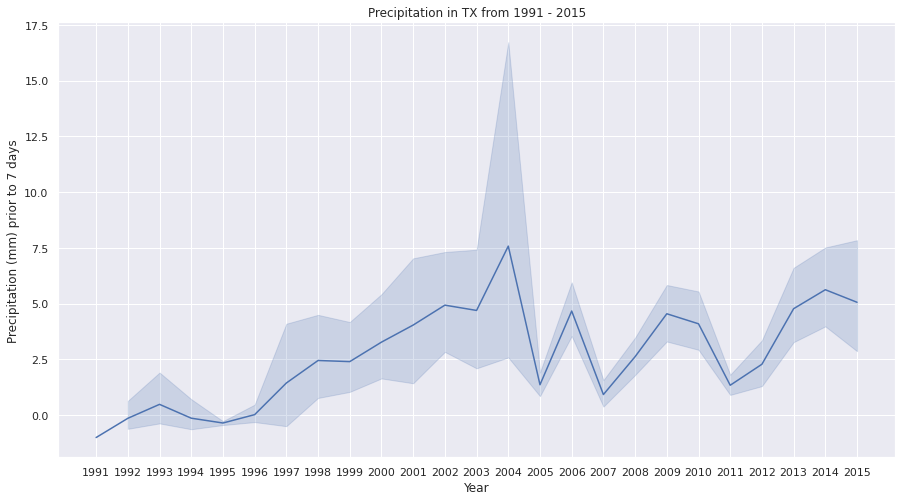

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.lineplot(x='disc_pre_year', y= 'Prec_pre_7', hue = None, data = tx_csv)

ax.set_xlabel('Year')
ax.set_ylabel('Precipitation (mm) prior to 7 days')
ax.set_title('Precipitation in TX from 1991 - 2015')
type(ax)
x = np.arange(1991, 2016, 1)
plt.xticks(x)
#during La Nina precipitation is lower than averge in the southwest of North America
#from the graph above you can see the years with high precipitation are the years where the wildfires are lower

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


matplotlib.axes._subplots.AxesSubplot

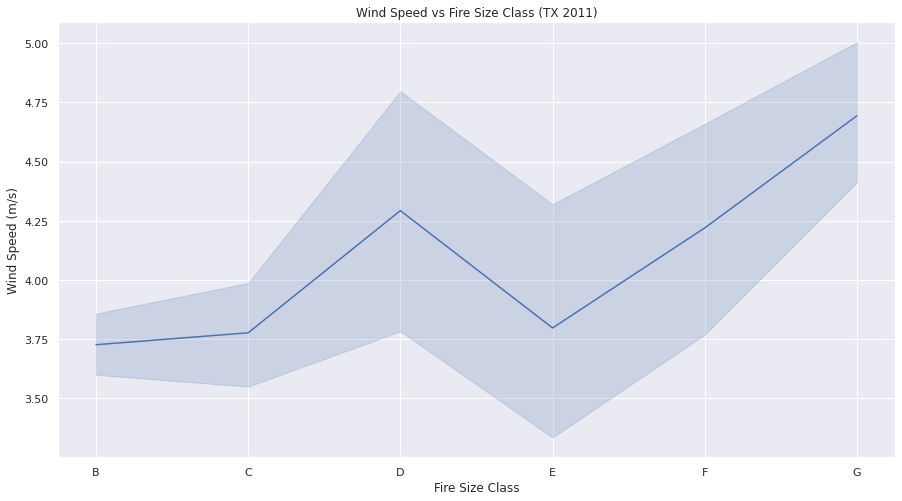

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
clean_tx_csv = tx_csv[(tx_csv['Wind_pre_7'] > 0) & (tx_csv['disc_pre_year'] == 2011)]

clean_tx_csv['fire_size_class'] = pd.Categorical(clean_tx_csv['fire_size_class'],
                                   categories=['B', 'C', 'D', 'E','F','G'],
                                   ordered=True)

sns.lineplot(x= 'fire_size_class', y= 'Wind_pre_7', data = clean_tx_csv)

ax.set_xlabel('Fire Size Class')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_title('Wind Speed vs Fire Size Class (TX 2011)')
type(ax)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


matplotlib.axes._subplots.AxesSubplot

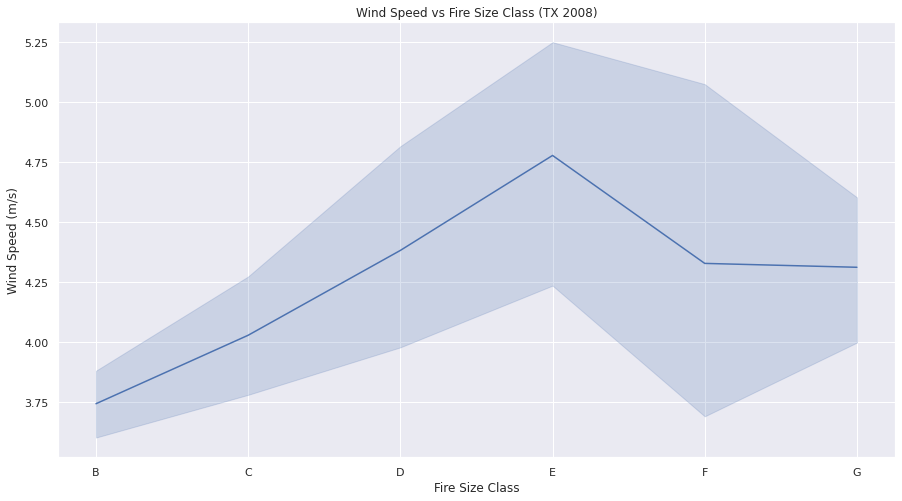

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
clean_tx_csv = tx_csv[(tx_csv['Wind_pre_7'] > 0) & (tx_csv['disc_pre_year'] == 2008)]

clean_tx_csv['fire_size_class'] = pd.Categorical(clean_tx_csv['fire_size_class'],
                                   categories=['B', 'C', 'D', 'E','F','G'],
                                   ordered=True)

sns.lineplot(x= 'fire_size_class', y= 'Wind_pre_7', data = clean_tx_csv)

ax.set_xlabel('Fire Size Class')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_title('Wind Speed vs Fire Size Class (TX 2008)')
type(ax)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


matplotlib.axes._subplots.AxesSubplot

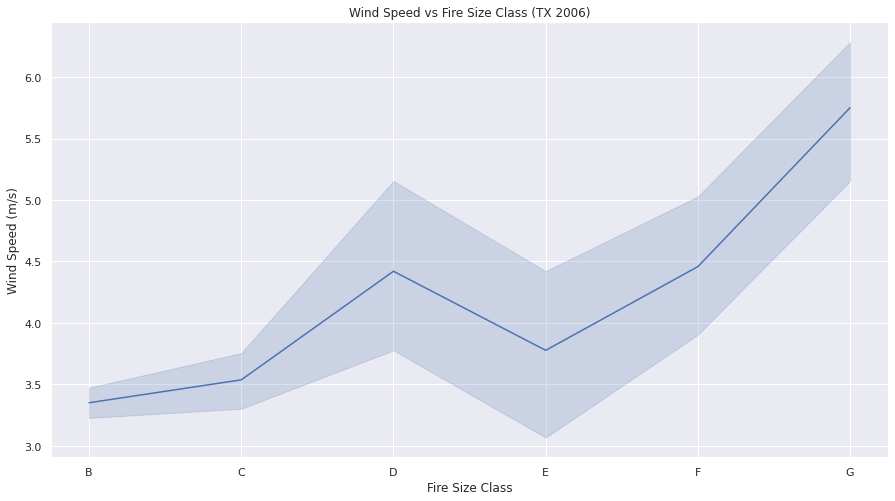

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
clean_tx_csv = tx_csv[(tx_csv['Wind_pre_7'] > 0) & (tx_csv['disc_pre_year'] == 2006)]

clean_tx_csv['fire_size_class'] = pd.Categorical(clean_tx_csv['fire_size_class'],
                                   categories=['B', 'C', 'D', 'E','F','G'],
                                   ordered=True)

sns.lineplot(x= 'fire_size_class', y= 'Wind_pre_7', data = clean_tx_csv)

ax.set_xlabel('Fire Size Class')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_title('Wind Speed vs Fire Size Class (TX 2006)')
type(ax)


([<matplotlib.axis.XTick at 0x7f01e36e78d0>,
 <a list of 25 Text major ticklabel objects>)

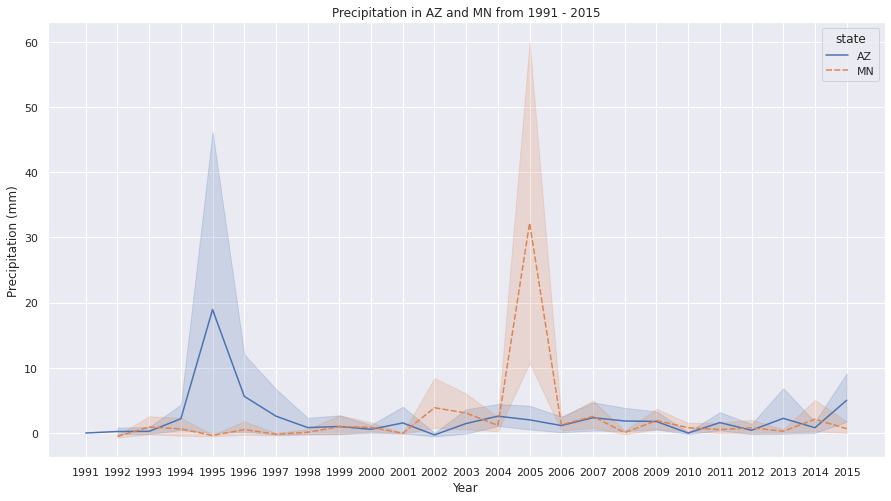

In [ ]:
#Comparing a south state with a north state precipitation (MN and AZ)
fig,ax=plt.subplots(figsize=(15,8))
az_mn_csv = new_csv[(new_csv['state'] == 'AZ') | (new_csv['state'] == 'MN')]

p = sns.lineplot(x = "disc_pre_year", y = "Prec_pre_7", data = az_mn_csv, hue = "state",
            style = "state")

p.set( xlabel = "Year", ylabel = "Precipitation (mm)",title = "Precipitation in AZ and MN from 1991 - 2015" )

x = np.arange(1991, 2016, 1)
plt.xticks(x)
#So the peaks during ENSO should be opposite

# Tenzin

In [ ]:
# !pip install geopandas


In [ ]:
# !pip install descartes


In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
%matplotlib inline

import geopandas as gpd
%matplotlib inline

# https://www.kaggle.com/capcloudcoder/us-wildfire-data-plus-other-attributes

In [ ]:
# read data and display with all columns
pd.set_option('display.max_columns', None)
df = pd.read_csv('FW_Veg_Rem_Combined.csv')
df_org = df
df.head()

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,disc_date_final,cont_date_final,putout_time,disc_date_pre,disc_pre_year,disc_pre_month,wstation_usaf,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,NaN,Feb,NaN,NaN,NaN,1/12/2007,2007,Jan,785140,58917.69716,11603,1945,2018,12,1.0,785140-11603-2007.gz,24.480974,24.716923,24.902597,24.527961,4.341807,3.492857,3.262092,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,NaN,Dec,NaN,NaN,NaN,11/11/2006,2006,Nov,723235,32665.34327,13896,1978,2020,15,0.1,723235-13896-2006.gz,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,NaN,Feb,NaN,NaN,NaN,1/30/2004,2004,Jan,723235,105122.14950,13896,1978,2020,16,1.0,723235-13896-2004.gz,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,6/6/2005,Jun,6/6/2005 2:14,6/6/2005 18:00,0 days 00:00:00.000000000,5/7/2005,2005,May,724880,43433.32978,23185,1942,2020,0,0.1,724880-23185-2005.gz,16.275967,18.996181,18.142564,0.000000,4.054982,3.398329,3.671282,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,NaN,Sep,NaN,NaN,NaN,8/23/1999,1999,Aug,722312,25940.57409,3908,1987,2016,12,0.1,File Not Found,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


In [ ]:
df.shape

(55367, 43)

In [ ]:
print(sum(df.duplicated())) 

0


In [ ]:
print(df['disc_pre_year'].min())
print(df['disc_pre_year'].max())

1991
2015


In [ ]:
#finding null values
df.isna().sum()

Unnamed: 0              0
Unnamed: 0.1            0
fire_name           29454
fire_size               0
fire_size_class         0
stat_cause_descr        0
latitude                0
longitude               0
state                   0
disc_clean_date         0
cont_clean_date     27890
discovery_month         0
disc_date_final     26659
cont_date_final     29735
putout_time         27890
disc_date_pre           0
disc_pre_year           0
disc_pre_month          0
wstation_usaf           0
dstation_m              0
wstation_wban           0
wstation_byear          0
wstation_eyear          0
Vegetation              0
fire_mag                0
weather_file            0
Temp_pre_30             0
Temp_pre_15             0
Temp_pre_7              0
Temp_cont               0
Wind_pre_30             0
Wind_pre_15             0
Wind_pre_7              0
Wind_cont               0
Hum_pre_30              0
Hum_pre_15              0
Hum_pre_7               0
Hum_cont                0
Prec_pre_30 

In [ ]:
#drop columns with null values and without description for the variable names
df = df.drop(columns=['Unnamed: 0','Unnamed: 0.1','fire_name','disc_clean_date','cont_clean_date',
                      'disc_date_final','cont_date_final', 'putout_time','disc_pre_year','disc_pre_month',
                      'wstation_usaf', 'dstation_m','wstation_wban',
                      'wstation_byear', 'wstation_eyear', 'weather_file'])

df.head()

,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,discovery_month,disc_date_pre,Vegetation,fire_mag,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,Feb,1/12/2007,12,1.0,24.480974,24.716923,24.902597,24.527961,4.341807,3.492857,3.262092,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,3.0,B,Arson,35.038330,-87.610000,TN,Dec,11/11/2006,15,0.1,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,60.0,C,Arson,34.947800,-88.722500,MS,Feb,1/30/2004,16,1.0,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,1.0,B,Debris Burning,39.641400,-119.308300,NV,Jun,5/7/2005,0,0.1,16.275967,18.996181,18.142564,0.000000,4.054982,3.398329,3.671282,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,2.0,B,Miscellaneous,30.700600,-90.591400,LA,Sep,8/23/1999,12,0.1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


In [ ]:
df.shape

(55367, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55367 entries, 0 to 55366
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fire_size         55367 non-null  float64
 1   fire_size_class   55367 non-null  object 
 2   stat_cause_descr  55367 non-null  object 
 3   latitude          55367 non-null  float64
 4   longitude         55367 non-null  float64
 5   state             55367 non-null  object 
 6   discovery_month   55367 non-null  object 
 7   disc_date_pre     55367 non-null  object 
 8   Vegetation        55367 non-null  int64  
 9   fire_mag          55367 non-null  float64
 10  Temp_pre_30       55367 non-null  float64
 11  Temp_pre_15       55367 non-null  float64
 12  Temp_pre_7        55367 non-null  float64
 13  Temp_cont         55367 non-null  float64
 14  Wind_pre_30       55367 non-null  float64
 15  Wind_pre_15       55367 non-null  float64
 16  Wind_pre_7        55367 non-null  float6

In [ ]:
# convert to datetime type
df['disc_date_pre'] = df['disc_date_pre'].astype('datetime64')
print(df['disc_date_pre'].dtype)


datetime64[ns]


In [ ]:
# investigating for invalid values of vegetaion
print(df['Vegetation'].value_counts())


12    17833
16    12263
15    10645
0      9752
9      3456
4       814
14      604
Name: Vegetation, dtype: int64


In [ ]:
# remove data with vegetation 0
df = df[df['Vegetation']!=0]
df.shape


(45615, 27)

In [ ]:
df.describe()

,fire_size,latitude,longitude,Vegetation,fire_mag,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
count,45615.000000,45615.000000,45615.000000,45615.000000,45615.000000,45615.000000,45615.000000,45615.000000,45615.000000,45615.000000,45615.000000,45615.000000,45615.000000,45615.000000,45615.000000,45615.000000,45615.000000,45615.000000,45615.000000,45615.000000,45615.000000,45615.000000
mean,1583.084814,35.271426,-93.014949,13.431875,8.103168,11.023590,11.099194,11.175425,7.856129,1.955278,1.869442,1.816544,1.118369,41.446202,38.997990,37.517302,24.758472,27.546132,12.079434,4.812213,16.285978,0.222373
std,11734.583229,5.972169,13.334993,2.495693,24.908223,10.583991,10.768735,10.939030,10.714215,2.116067,2.134738,2.151845,2.035206,31.315818,31.313092,31.129447,31.411299,118.866270,59.404982,31.957073,62.557099,0.125648
min,0.510000,17.956533,-159.761429,4.000000,0.100000,-14.600000,-37.000000,-20.846104,-22.750000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.130000,31.719090,-99.000100,12.000000,0.100000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.137958
50%,3.340000,33.774120,-90.123900,15.000000,0.100000,10.413158,10.511270,10.659322,0.000000,2.459722,2.333423,2.212127,0.000000,57.207156,53.187987,49.556757,0.000000,0.000000,0.000000,0.000000,0.000000,0.198894
75%,15.000000,40.061772,-82.768374,16.000000,1.000000,20.582243,20.806327,21.023713,17.443189,3.509452,3.474023,3.429056,2.862889,67.980309,66.512979,65.359781,60.769343,20.600000,4.000000,0.000000,0.000000,0.271466
max,558198.300000,48.998667,-65.285833,16.000000,100.000000,46.600000,46.000000,55.000000,55.000000,29.800000,29.800000,25.700000,24.200000,96.000000,94.000000,96.000000,94.000000,13560.800000,2527.000000,1638.000000,2126.000000,1.000000


In [ ]:
# list of atmospheric variables
var = ['Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7', 'Temp_cont',
       'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Wind_cont',
       'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7', 'Hum_cont', 'Prec_pre_30',
       'Prec_pre_15', 'Prec_pre_7', 'Prec_cont']  # list of column names for which to detect anomalies

# remove anamolies in the atmospheric variables in var
for v in var:
    z = np.abs(stats.zscore(df[v]))
    df = df[(z < 3)]
df.shape


(41974, 27)

Text(0.5, 0, 'Atmosheric variables in var')

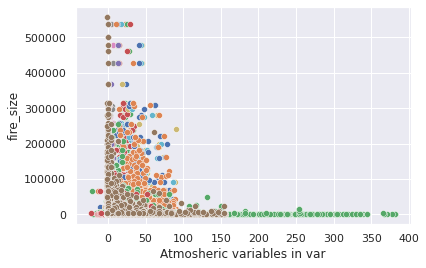

In [ ]:
# check for any anamoly left while plotting with fire_size
for i in var:
    sns.scatterplot(data=df, x=i, y="fire_size", legend=True)
plt.xlabel("Atmosheric variables in var")
# tenzin

Text(0.5, 0, 'Atmosheric variables in var')

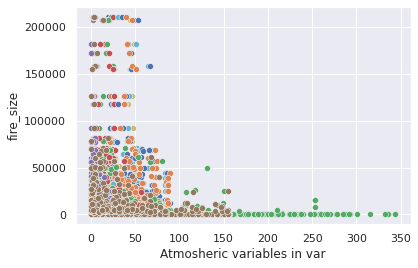

In [ ]:
# remove any rows that have values less than 1 for atmospheric variables in var
for i in var:
    df = df[df[i] > 0]
for i in var:
    sns.scatterplot(data=df, x=i, y="fire_size", legend=True)
plt.xlabel("Atmosheric variables in var")
# tenzin

In [ ]:
# check all classification levels 
df['fire_size_class'].unique()

# tenzin

array(['C', 'B', 'D', 'E', 'F', 'G'], dtype=object)

In [ ]:
def classify_size(l):  #create sub-dataframes according to fire_size_class
    return df[df['fire_size_class']==l]
   
df_B = classify_size('B')
df_C = classify_size('C')
df_D = classify_size('D')
df_E = classify_size('E')
df_F = classify_size('F')
df_G = classify_size('G')
df_names = [df_B, df_C, df_D, df_E, df_F, df_G]

# tenzin

In [ ]:
# Shapes of all the sub-dataframes
print("G max: " + str(df_G['fire_size'].max()))
print("G max: " + str(df_G['fire_size'].min()))
print()
print("F max: " + str(df_F['fire_size'].max()))
print("F max: " + str(df_F['fire_size'].min()))
print()
print("E max: " + str(df_E['fire_size'].max()))
print("E max: " + str(df_E['fire_size'].min()))
print()
print("D max: " + str(df_D['fire_size'].max()))
print("D max: " + str(df_D['fire_size'].min()))
print()
print("C max: " + str(df_C['fire_size'].max()))
print("C max: " + str(df_C['fire_size'].min()))
print()
print("B max: " + str(df_B['fire_size'].max()))
print("B max: " + str(df_B['fire_size'].min()))

G max: 210874.0
G max: 5000.0

F max: 4924.0
F max: 1000.0

E max: 984.0
E max: 300.0

D max: 275.0
D max: 100.0

C max: 96.0
C max: 10.0

B max: 9.95
B max: 0.52


([<matplotlib.axis.XTick at 0x7f01e1c35990>,
 <a list of 11 Text major ticklabel objects>)

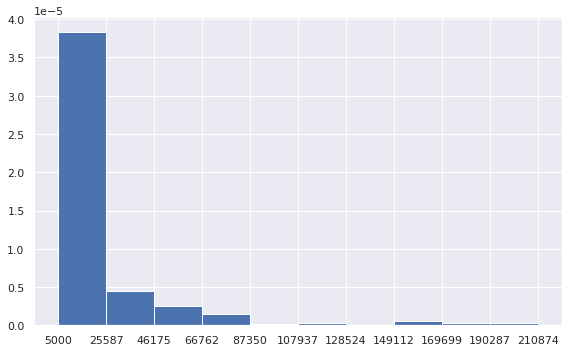

In [ ]:
# checking the distribution of fire sizes in df_G for which the difference in max and min values were very large
fig, ax = plt.subplots(figsize=(8,5), tight_layout=True)
n, bins, patches = ax.hist(df_G['fire_size'], bins= 10, density=True)
plt.xticks(bins)

In [ ]:
def fire_group(x):   # subsetting larger fire sizes into more evenly distributed categories
    if x["fire_size"]>=5000 and x["fire_size"]<10000:
        return "Low_extreme"
    if x["fire_size"]>=10000 and x["fire_size"]<50000:
        return "Mid_extreme"
    if x["fire_size"]>=50000:
        return "High_extreme"
    else:
        return x["fire_size_class"] 

#create new column with new fire size categories where the density for these categories are more evenly distributed
df["fire_group"] = df.apply(lambda x: fire_group(x), axis=1) 

# sorting in descending order according to fire_size
df = df.sort_values(by="fire_size", ascending=False)
df

,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,discovery_month,disc_date_pre,Vegetation,fire_mag,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,fire_group
54493,210874.00,G,Lightning,42.453300,-115.025300,ID,Jul,2012-06-07,9,100.0,19.783243,22.485014,23.151445,25.503398,5.092693,4.878202,5.079191,4.174272,32.434371,30.852861,35.445087,40.033981,2.8,2.0,2.0,3.8,0.033948,High_extreme
52684,207115.00,G,Lightning,45.536111,-109.934722,MT,Aug,2006-07-23,15,100.0,20.155541,18.197113,17.148352,15.190830,2.917623,2.911024,2.647802,2.657320,44.269693,48.199475,53.313187,46.588089,19.9,13.8,13.0,13.9,0.036934,High_extreme
54405,181948.00,G,Lightning,44.429722,-115.172222,ID,Jul,2012-06-27,15,100.0,15.388734,16.142897,17.173214,15.699162,1.531476,1.591341,1.857143,1.539385,49.021008,51.357746,42.214286,40.625698,18.2,10.8,0.3,3.3,0.049862,High_extreme
51292,172135.00,G,Lightning,45.221667,-114.495000,ID,Jul,2000-06-10,9,100.0,16.837989,18.533520,17.469880,20.646240,2.351332,2.337430,2.451205,1.750491,46.732118,43.145251,44.993976,43.445225,4.4,1.3,0.5,6.8,0.043796,High_extreme
51045,158000.00,G,Arson,26.233700,-80.766500,FL,Apr,1999-03-20,12,100.0,23.646505,24.561039,24.489362,20.208333,3.911022,4.037922,4.786702,3.775000,65.803499,64.875325,67.356383,46.125000,7.4,6.1,6.1,4.3,0.807280,High_extreme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44273,0.55,B,Equipment Use,44.103840,-103.180830,SD,Jun,2000-05-10,15,0.1,14.041457,15.583548,17.766082,19.247031,5.549709,5.516185,5.836709,5.543478,63.493955,64.926829,64.074830,62.819620,31.6,15.8,0.3,22.3,0.325879,B
9109,0.54,B,Miscellaneous,34.391480,-83.066805,GA,Dec,2007-11-02,16,0.1,11.720550,11.036207,9.538843,10.310098,2.170729,1.777155,1.723554,2.264608,60.173171,67.465324,69.920705,71.323499,31.3,23.4,16.3,149.7,0.143836,B
2067,0.54,B,Powerline,45.574610,-88.028850,WI,Apr,2010-03-16,15,0.1,5.343710,7.857794,4.843478,8.868262,3.213248,3.580096,4.148309,3.853468,57.098340,60.980723,60.782609,56.319042,7.2,7.2,3.1,20.4,0.183541,B
7910,0.54,B,Debris Burning,34.398126,-83.895658,GA,Mar,2004-02-21,16,0.1,10.918552,12.161290,14.360577,13.314750,3.460249,3.683831,3.507212,3.487573,60.659148,52.493506,59.811518,55.303106,32.0,12.6,10.0,63.6,0.151245,B


In [ ]:
# creating additional dataframes for the new fire categories
df_low = df[df["fire_group"]=="Low_extreme"]
df_mid = df[df["fire_group"]=="Mid_extreme"]
df_high = df[df["fire_group"]=="High_extreme"]

In [ ]:
print(df_low.shape)
print(df_mid.shape)
print(df_high.shape)

(112, 28)
(130, 28)
(28, 28)


In [ ]:
df_mid.head()
# df_high
# df_low

,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,discovery_month,disc_date_pre,Vegetation,fire_mag,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,fire_group
52936,49500.0,G,Lightning,26.251940,-80.580000,FL,Jun,2006-05-04,12,100.0,25.557208,26.477240,26.847208,27.456893,3.391033,2.886925,3.121320,3.811050,70.471591,70.167070,71.451777,73.668490,131.1,8.4,4.1,37.1,0.809451,Mid_extreme
53141,49390.0,G,Miscellaneous,33.277500,-116.868056,CA,Oct,2007-09-23,16,100.0,15.398404,14.427673,14.983234,13.683627,2.567639,2.897161,3.946386,1.376765,63.578244,65.116317,59.526154,68.765957,5.5,4.9,0.8,0.6,0.140577,Mid_extreme
55329,49100.0,G,Lightning,44.505000,-117.643060,OR,Aug,2015-07-12,15,100.0,18.619433,19.270308,18.778107,15.845419,2.596196,2.408146,2.604167,2.627684,52.187328,46.449438,47.023810,55.092470,14.5,0.5,0.5,10.4,0.094251,Mid_extreme
53036,48800.0,G,Lightning,42.741389,-103.790278,NE,Jul,2006-06-27,4,100.0,24.127564,26.434037,25.028889,23.708497,3.850578,3.848549,3.683333,4.338039,47.737321,39.126649,47.655556,48.349476,23.3,9.1,9.1,2.8,0.170001,Mid_extreme
53376,44452.0,G,Lightning,41.592500,-123.431667,CA,Jul,2008-06-23,15,100.0,12.170654,12.031157,11.810843,13.143848,2.865200,3.195709,2.618474,2.507206,85.892210,84.115702,86.506329,89.261058,1.5,0.9,0.3,27.6,0.187882,Mid_extreme


([<matplotlib.axis.XTick at 0x7f01e1afded0>,
 <a list of 11 Text major ticklabel objects>)

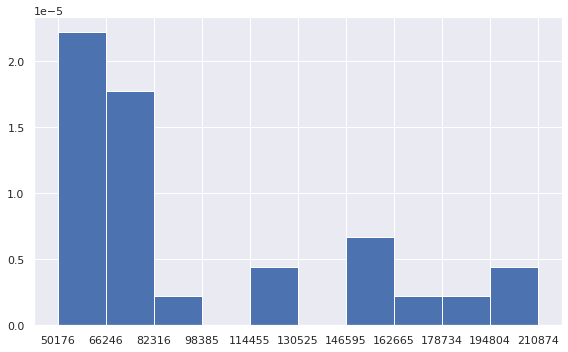

In [ ]:
#checking the distribution/skew of the new dataframe containing the largest fires
fig, ax = plt.subplots(figsize=(8,5), tight_layout=True)
n, bins, patches = ax.hist(df_high['fire_size'], bins= 10, density=True)
plt.xticks(bins)

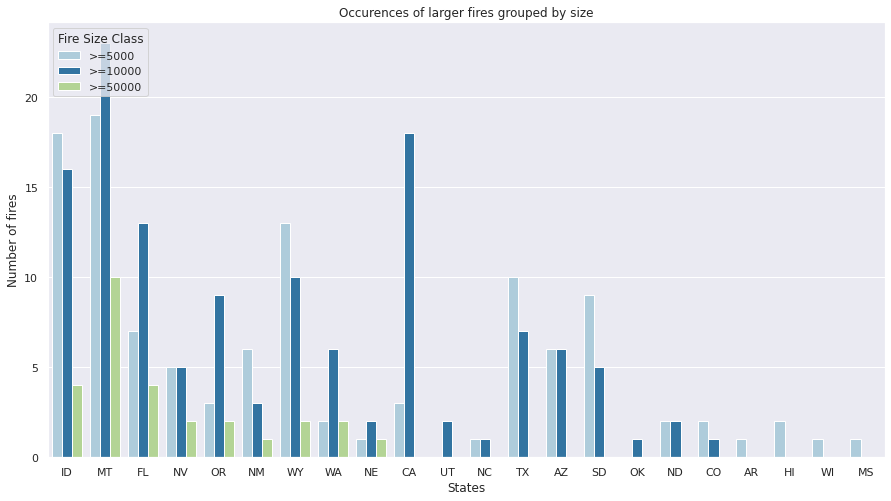

In [ ]:
# Plotting number of larger fires occuring in different states 
df_new = df[df["fire_group"].isin(["Mid_extreme", "Low_extreme", "High_extreme"])]
order = ["Low_extreme","Mid_extreme", "High_extreme"]
plt.subplots(figsize=(15,8))
ax=sns.countplot(x='state', data=df_new, hue="fire_group", hue_order=order, palette="Paired")

plt.xlabel("States")
plt.ylabel("Number of fires")
plt.title("Occurences of larger fires grouped by size")
plt.legend(title='Fire Size Class', loc='upper left', labels=[">=5000",">=10000",">=50000"])
# plt.savefig("barLargebyStates")
plt.show()

In [ ]:
# Using geopandas to plot locations of fires in the U.S.
us=gpd.read_file('tl_2017_us_state.shp')

In [ ]:
us.shape

(56, 15)

In [ ]:
# crete new column with longitude and latitude data as point
geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
geometry[:3]

In [ ]:
# Focusing on fires in mainland states only
ter = ['United States Virgin Islands',  'Commonwealth of the Northern Mariana Islands', 'Guam', 'American Samoa', 'Puerto Rico', 'Alaska','Hawaii']
for t in ter:
    us = us[us['NAME'] != t]

In [ ]:
us.shape

(49, 15)

In [ ]:
#create new data frame including the column with the newly create geometry column
geo_df =gpd.GeoDataFrame(df, crs='epsg:4326', geometry=geometry)
geo_df.head()

,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,discovery_month,disc_date_pre,Vegetation,fire_mag,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,fire_group,geometry
54493,210874.0,G,Lightning,42.453300,-115.025300,ID,Jul,2012-06-07,9,100.0,19.783243,22.485014,23.151445,25.503398,5.092693,4.878202,5.079191,4.174272,32.434371,30.852861,35.445087,40.033981,2.8,2.0,2.0,3.8,0.033948,High_extreme,POINT (-115.02530 42.45330)
52684,207115.0,G,Lightning,45.536111,-109.934722,MT,Aug,2006-07-23,15,100.0,20.155541,18.197113,17.148352,15.190830,2.917623,2.911024,2.647802,2.657320,44.269693,48.199475,53.313187,46.588089,19.9,13.8,13.0,13.9,0.036934,High_extreme,POINT (-109.93472 45.53611)
54405,181948.0,G,Lightning,44.429722,-115.172222,ID,Jul,2012-06-27,15,100.0,15.388734,16.142897,17.173214,15.699162,1.531476,1.591341,1.857143,1.539385,49.021008,51.357746,42.214286,40.625698,18.2,10.8,0.3,3.3,0.049862,High_extreme,POINT (-115.17222 44.42972)
51292,172135.0,G,Lightning,45.221667,-114.495000,ID,Jul,2000-06-10,9,100.0,16.837989,18.533520,17.469880,20.646240,2.351332,2.337430,2.451205,1.750491,46.732118,43.145251,44.993976,43.445225,4.4,1.3,0.5,6.8,0.043796,High_extreme,POINT (-114.49500 45.22167)
51045,158000.0,G,Arson,26.233700,-80.766500,FL,Apr,1999-03-20,12,100.0,23.646505,24.561039,24.489362,20.208333,3.911022,4.037922,4.786702,3.775000,65.803499,64.875325,67.356383,46.125000,7.4,6.1,6.1,4.3,0.807280,High_extreme,POINT (-80.76650 26.23370)


In [ ]:
# !pip install mapclassify

Text(0.5, 1.0, 'Wildfires in the U.S. (in acres)')

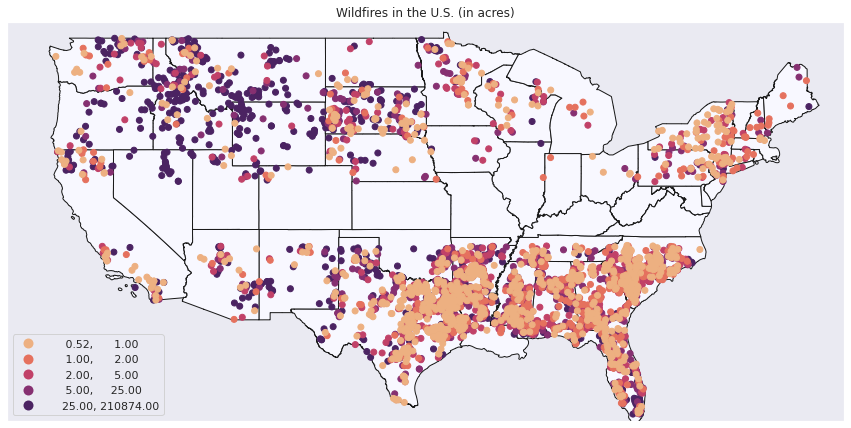

In [ ]:
# Plot wildfire occurences in US states with fire size as color variable
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xlim(-128, -65)
ax.set_ylim(25, 50)
ax.set_yticks([])
ax.set_xticks([])

us.plot(ax=ax, color="ghostwhite", edgecolor='k')
geo_df.plot(column="fire_size", ax=ax, cmap="flare", scheme="quantiles", legend=True)
plt.title("Wildfires in the U.S. (in acres)")
# plt.savefig("map")

Text(0.5, 1.0, 'Wildfires in the U.S. (in acres)')

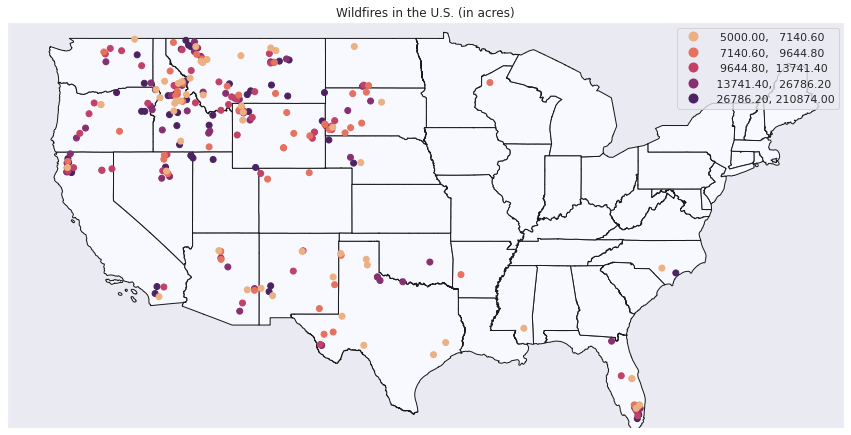

In [ ]:
# Plot wildfire occurences in US states with fire size as color variable
geo_df2 = geo_df[geo_df["fire_group"].isin(["Mid_extreme", "Low_extreme", "High_extreme"])]
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xlim(-128, -65)
ax.set_ylim(25, 50)
ax.set_yticks([])
ax.set_xticks([])

us.plot(ax=ax, color="ghostwhite", edgecolor='k')
geo_df2.plot(column="fire_size", ax=ax, cmap="flare", scheme="quantiles", legend=True)
plt.title("Wildfires in the U.S. (in acres)")
# plt.savefig("map")

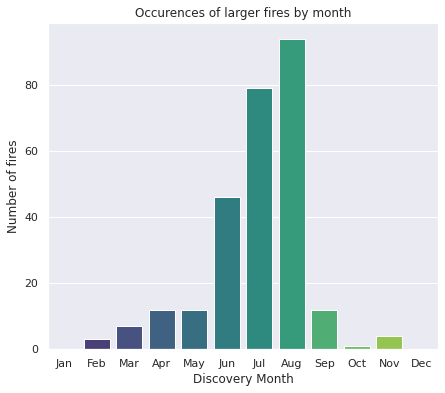

In [ ]:
# plot number of larger fires occuring in each month
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.subplots(figsize=(7,6))
sns.countplot(x='discovery_month', data=geo_df2, palette='viridis', order=months)
plt.xlabel("Discovery Month")
plt.ylabel("Number of fires")
plt.title("Occurences of larger fires by month")
# plt.savefig("bymonth")
plt.show()
#tenzin

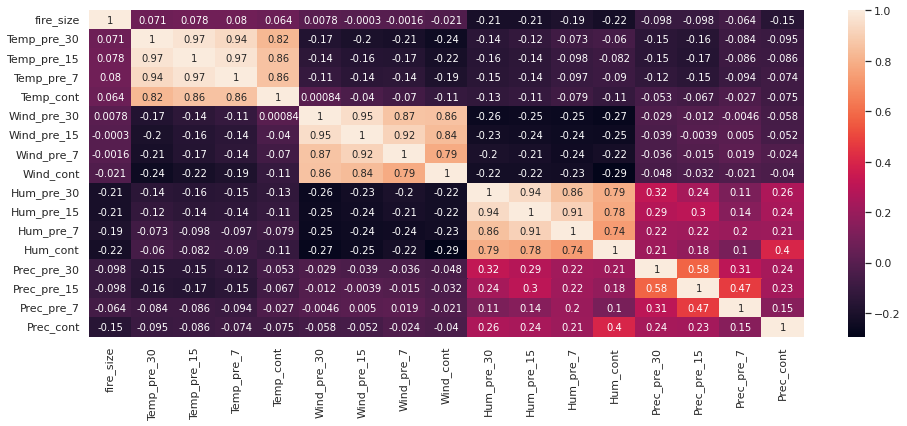

In [ ]:
# show correlation between features
var2 = list(var)
var2.append("fire_size")
df_var= df.loc[:, df.columns.isin(var2)]

plt.figure(figsize=(16, 6))
sns.heatmap(df_var.corr(), annot=True)


In [ ]:
print(var2)

['Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7', 'Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Wind_cont', 'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7', 'Hum_cont', 'Prec_pre_30', 'Prec_pre_15', 'Prec_pre_7', 'Prec_cont', 'fire_size']


The heatmap shows that there is high correlation between the following variables:
    {Temp_pre_30, Temp_pre_15,  and Temp_pre_7}
    {Wind_pre_30, 'Wind_pre_15, and Wind_pre_7}
    {Hum_pre_30, Hum_pre_15, and Hum_pre_7}
    
    

Text(0.5, 1.0, 'Atmospheric variables and FireSize                                                                                                                                                                                                                                                                                                            ')

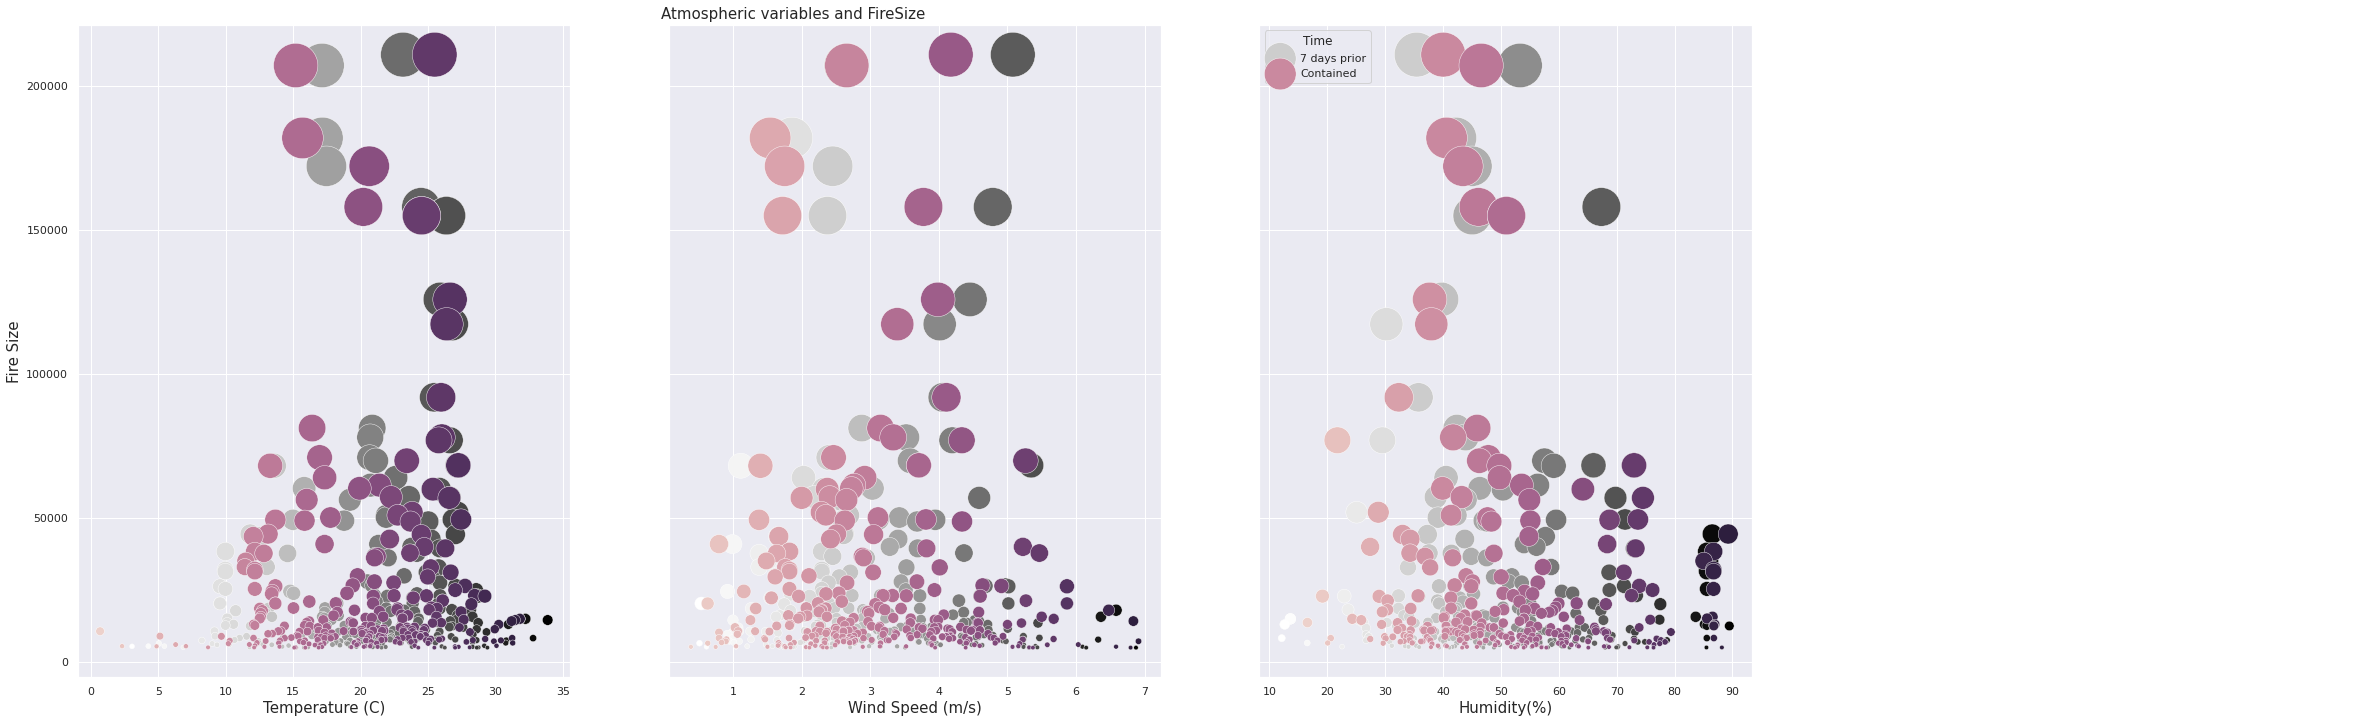

In [ ]:
# Since the temp, wind, humidity variables have high correlation 
# for values 30,15 and 7 days prior to the day the fire was contained, 
# we observe the relationship of only one of these variables

sns.set_style("darkgrid") 
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(30,12))

sns.scatterplot(data=geo_df2, x="Temp_pre_7", y="fire_size", hue="Temp_pre_7", size="fire_size", ax=ax1, legend=False, sizes=(20, 2000), palette="Greys")
sns.scatterplot(data=geo_df2, x="Temp_cont", y="fire_size", hue="Temp_cont", size="fire_size",ax=ax1, legend=False, sizes=(20, 2000))
ax1.set_xlabel("Temperature (C)", fontsize=15)
ax1.set_ylabel("Fire Size", fontsize=15)

sns.scatterplot(data=geo_df2, x="Wind_pre_7", y="fire_size", hue="Wind_pre_7", size="fire_size",ax=ax2, legend=False, sizes=(20, 2000),palette="Greys")
sns.scatterplot(data=geo_df2, x="Wind_cont", y="fire_size", hue="Wind_cont", size="fire_size", ax=ax2, legend=False, sizes=(20, 2000))
ax2.set_xlabel("Wind Speed (m/s)", fontsize=15)

sns.scatterplot(data=geo_df2, x="Hum_pre_7", y="fire_size", hue="Hum_pre_7", size="fire_size",ax=ax3, legend=False, sizes=(20, 2000),palette="Greys")
sns.scatterplot(data=geo_df2, x="Hum_cont", y="fire_size", hue="Hum_cont", size="fire_size", ax=ax3, legend=False, sizes=(20, 2000))
ax3.set_xlabel("Humidity(%)",fontsize=15)
plt.legend(title='Time', loc='upper left', labels=['7 days prior', 'Contained'])

t="Atmospheric variables and FireSize" + " "*300
plt.title(t, fontsize=15)
# plt.savefig("TempWindHum")

Text(0.5, -0.25, 'Precipitation (mm)                                                                                                                                                                                                                                      ')

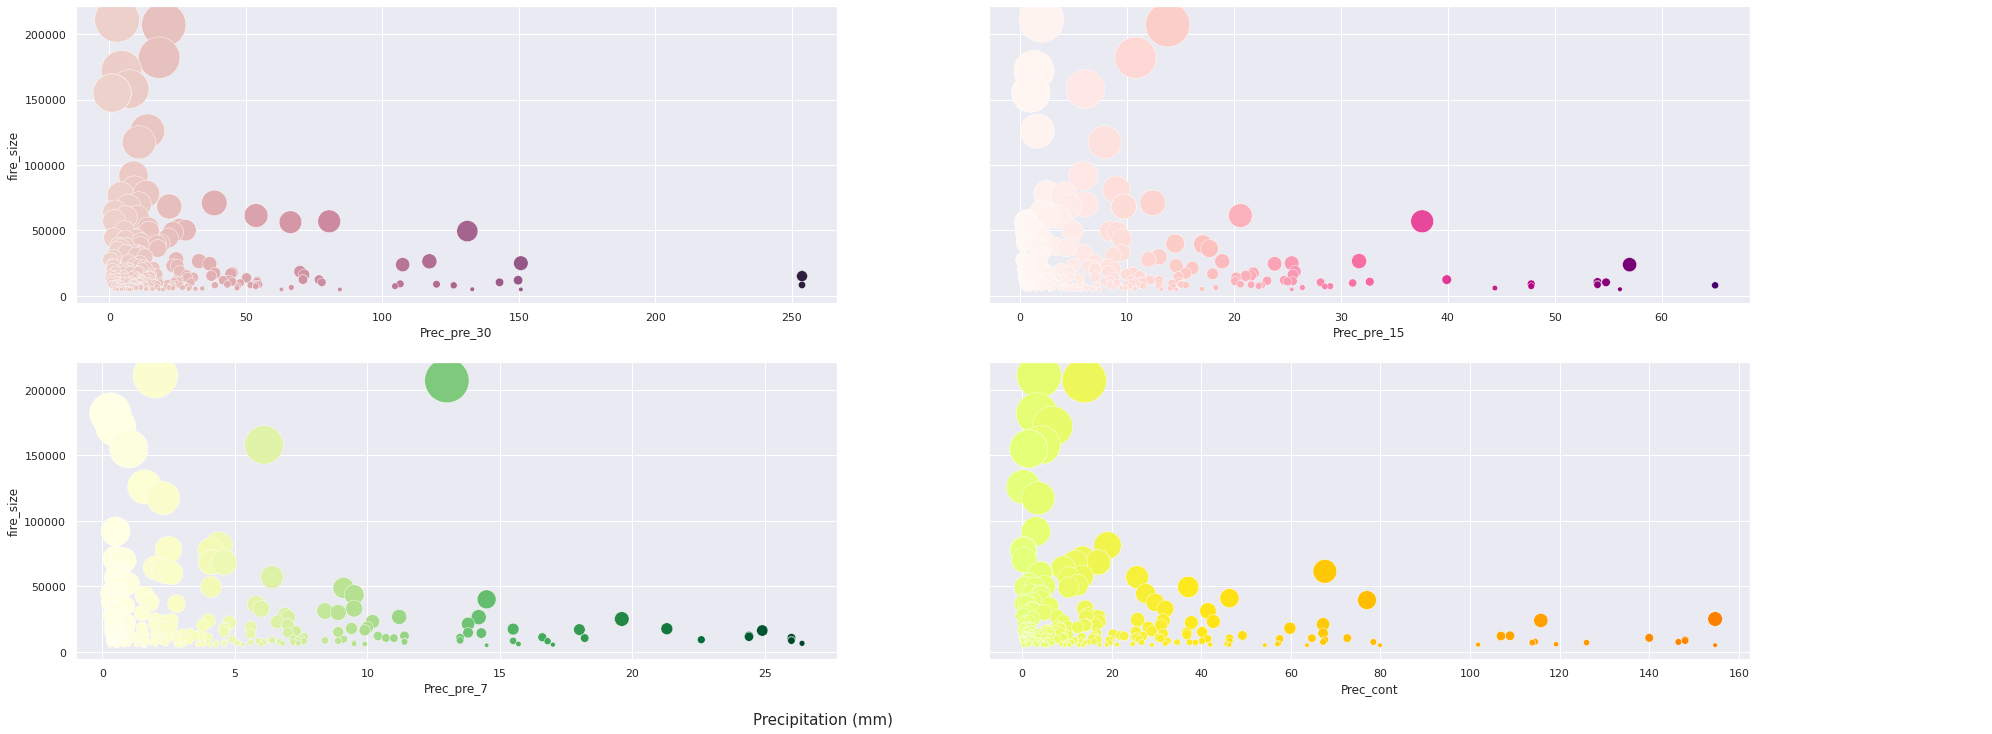

In [ ]:
# Investigating relationship between precipitation and wildfire sizes

fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(30,12))
sns.scatterplot(data=geo_df2, x="Prec_pre_30", y="fire_size", hue="Prec_pre_30", size="fire_size", ax=axes[0,0], legend=False, sizes=(20, 2000))
sns.scatterplot(data=geo_df2, x="Prec_pre_15", y="fire_size", hue="Prec_pre_15", size="fire_size", ax=axes[0,1], legend=False, sizes=(20, 2000), palette="RdPu")
sns.scatterplot(data=geo_df2, x="Prec_pre_7", y="fire_size", hue="Prec_pre_7", size="fire_size", ax=axes[1,0], legend=False, sizes=(20, 2000), palette="YlGn")
sns.scatterplot(data=geo_df2, x="Prec_cont", y="fire_size", hue="Prec_cont", size="fire_size", ax=axes[1,1], legend=False, sizes=(20, 2000), palette="Wistia" )

t="Precipitation (mm)" + " "*230
plt.title(t, fontsize=15, va='bottom', y=-0.25)
# plt.savefig("Prec")

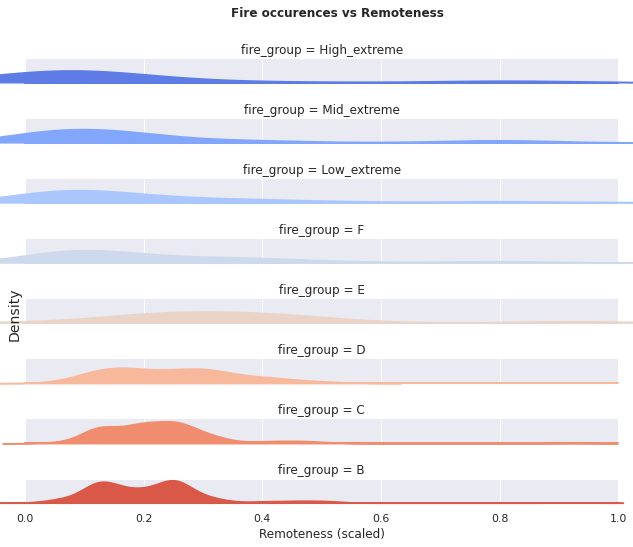

In [ ]:
# Checking relation of density of fire occurences and the remoteness
rem_dens = sns.FacetGrid(df, row='fire_group', hue='fire_group', aspect=10, height=0.9, palette="coolwarm")
rem_dens.map(sns.kdeplot, 'remoteness', bw_adjust=1, clip_on=False, fill=True, alpha=1, linewidth=1.5)
rem_dens.map(plt.axhline, y=0, lw=2, clip_on=False)

fire_group_num = {"B":">0", "C":">=10", "D":">=100", "E":">=300", "F":">=1000", "Low_extreme":">=5000","Mid_extrem":">=10000","High_extreme":">=50000"}
fire_group_num = [">0", ">=10", ">=100", ">=300", ">=1000",">=5000",">=10000", ">=50000"]
rem_dens.set(yticks=[])
rem_dens.set(ylabel="")
rem_dens.despine(bottom=True, left=True)
rem_dens.set(xlim=(0,1))
plt.xlabel('Remoteness (scaled)', fontsize=12)
plt.ylabel('Density', fontsize=14, y=8)
# plt.legend(handles="coolwarm", labels=fire_group_num)
rem_dens.fig.suptitle('Fire occurences vs Remoteness', fontweight="bold", ha='center', x=0.55, y=1.05)
# plt.savefig("rem_dens")
plt.show()

Text(-15.665000000000006, 0.5, 'Fire size (in acres)')

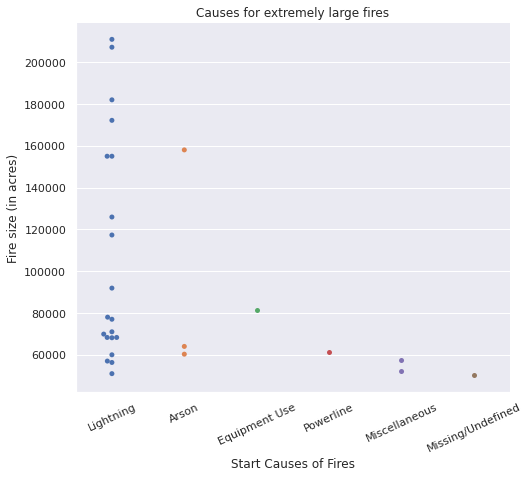

In [ ]:
# causes for high_extreme wildfires 
sns.set_theme()
sns.catplot(x="stat_cause_descr", y="fire_size",
               data=df_high, kind="swarm", height=6, aspect=1.25/1)
plt.tick_params(axis='x', labelrotation = 25)
plt.title('Causes for extremely large fires')
plt.xlabel("Start Causes of Fires")
plt.ylabel("Fire size (in acres)")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(-15.665000000000006, 0.5, 'Fire size (in acres)')

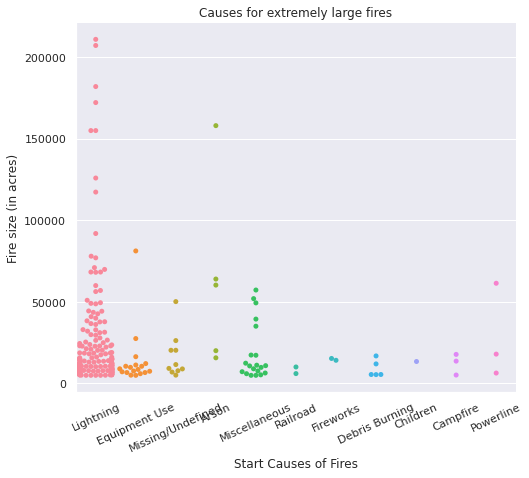

In [ ]:
# causes for class G wildfires 
sns.catplot(x="stat_cause_descr", y="fire_size",
               data=df_G, kind="swarm", height=6, aspect=1.25/1)
plt.tick_params(axis='x', labelrotation = 25)
plt.title('Causes for extremely large fires')
plt.xlabel("Start Causes of Fires")
plt.ylabel("Fire size (in acres)")